# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
187536,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0049,0.0024,0.0806,0,0,0,0
453911,2.2803,1.7285,1.5576,0.5981,0.1538,0.1416,2.5562,0.8057,0.1855,0.1880,1,1,22,22
143034,0.0171,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0439,0.0024,0.0391,0,0,0,0
342688,0.6055,0.1416,0.1636,0.0244,0.0024,0.0171,0.1196,0.5444,0.1440,0.0366,1,1,11,11
94210,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0586,0.0586,0.0024,0.0342,0,0,0,0


In [3]:
raw_data.shape

(471483, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

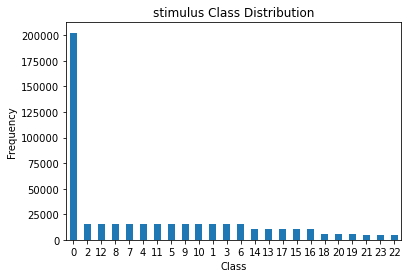

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
373080,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0513,0.0195,0.0928,0.0073,0,0,0,0
69867,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.1245,0.0024,0.0049,0,0,0,0
352952,0.0171,0.0024,0.0049,0.0024,0.0024,0.0024,0.0171,0.1172,0.1221,0.0464,0,0,0,0
92096,0.0854,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.2124,0.1099,0.0073,10,10,11,11
340075,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1294,0.0024,0.0488,0,0,0,0


In [12]:
raw_data.shape

(378535, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378535 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          378535 non-null  float64
 1   Emg2          378535 non-null  float64
 2   Emg3          378535 non-null  float64
 3   Emg4          378535 non-null  float64
 4   Emg5          378535 non-null  float64
 5   Emg6          378535 non-null  float64
 6   Emg7          378535 non-null  float64
 7   Emg8          378535 non-null  float64
 8   Emg9          378535 non-null  float64
 9   Emg10         378535 non-null  float64
 10  repetition    378535 non-null  int64  
 11  rerepetition  378535 non-null  int64  
 12  stimulus      378535 non-null  int64  
 13  restimulus    378535 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [163]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [164]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# AutoEncoder

# Scale data

In [199]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from tensorflow.keras.models import load_model

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
t = StandardScaler()
t.fit(X)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

C:\Users\nafem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [202]:
n_inputs = X.shape[1]

# AutoEncoder Architecture

In [203]:
# define encoder
visible = Input(shape=(n_inputs,))

### Encoder Layer

In [204]:
# encoder level 1
e = Dense(128, activation = 'relu')(visible)

e = Dense(256, activation = 'relu')(e)
e = BatchNormalization()(e)

### Bottleneck Layer

In [205]:
# bottleneck
n_bottleneck = 3
bottleneck = Dense(n_bottleneck)(e)

### Decoder Layer

In [206]:
# decoder level 1
d = Dense(256, activation = 'relu')(bottleneck)
d = BatchNormalization()(d)
d = Dense(128, activation = 'relu')(d)


In [207]:
# output layer
output = Dense(n_inputs, activation='softmax')(d)

In [208]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

# Model Compilation

In [209]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

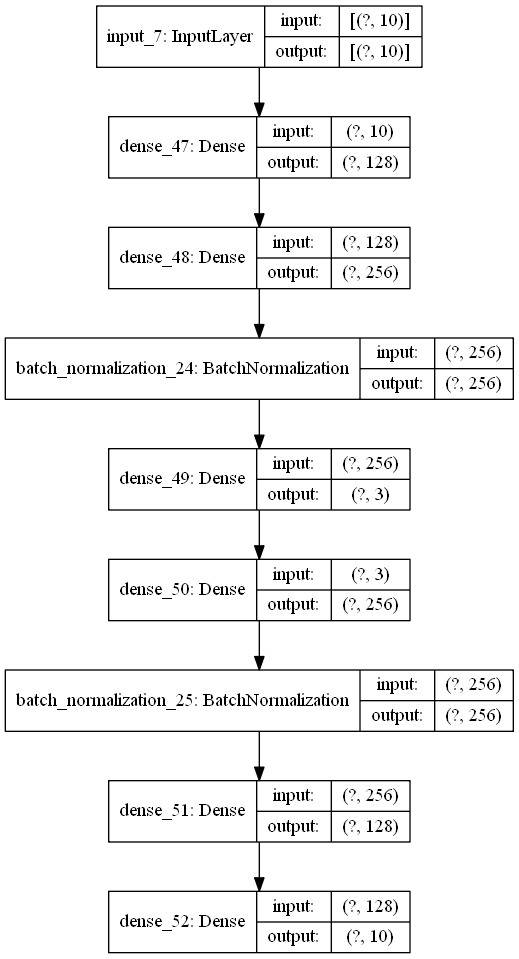

In [210]:
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)

In [211]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=50, batch_size=1064,validation_data=(X_test,X_test))

Epoch 1/50
285/285 [==============================] - 9s 32ms/step - loss: 136.1192 - val_loss: 136.1495
Epoch 2/50
285/285 [==============================] - 9s 30ms/step - loss: 136.0608 - val_loss: 136.1333
Epoch 3/50
285/285 [==============================] - 7s 26ms/step - loss: 136.0577 - val_loss: 136.1333
Epoch 4/50
285/285 [==============================] - 9s 31ms/step - loss: 136.0564 - val_loss: 136.1364oss: 136.16
Epoch 5/50
285/285 [==============================] - 8s 27ms/step - loss: 136.0562 - val_loss: 136.1287
Epoch 6/50
285/285 [==============================] - 9s 31ms/step - loss: 136.0550 - val_loss: 136.1313
Epoch 7/50
285/285 [==============================] - 10s 34ms/step - loss: 136.0546 - val_loss: 136.1289
Epoch 8/50
285/285 [==============================] - 10s 34ms/step - loss: 136.0544 - val_loss: 136.1323
Epoch 9/50
285/285 [==============================] - 9s 33ms/step - loss: 136.0544 - val_loss: 136.1281A
Epoch 10/50
285/285 [====================

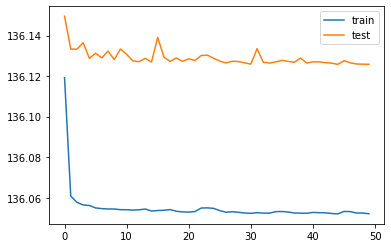

In [212]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [213]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

# Encoder as Data Preparation for Predictive Model

In [214]:
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

# Machine Learning Models

# Decision Tree

In [215]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train_encode, y_train)

DecisionTreeClassifier()

In [216]:
y_pred1 = tree.predict(X_test_encode)

In [217]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 56.93132735414162


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     40005
           1       0.16      0.17      0.16      2108
           2       0.23      0.23      0.23      1923
           3       0.26      0.25      0.26      2110
           4       0.16      0.15      0.15      1957
           5       0.24      0.24      0.24      2046
           6       0.17      0.17      0.17      2187
           7       0.25      0.25      0.25      1753
           8       0.14      0.15      0.15      1740
           9       0.21      0.21      0.21      1876
          10       0.30      0.30      0.30      2030
          11       0.17      0.17      0.17      1940
          12       0.16      0.15      0.16      2123
          13       0.15      0.16      0.16      1332
          14       0.19      0.20      0.20      1226
          15       0.30      0.30      0.30      1161
          16       0.21      0.21      0.21      1543
 

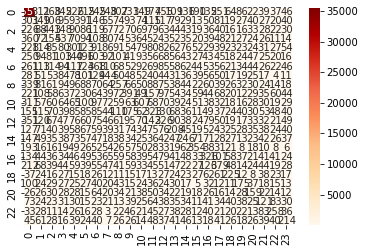

In [218]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [219]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 3.1484803254652807
MSE: 34.554030670875875
RMSE: 5.8782676590025975


In [220]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.5685434003183366
Recall Score :  0.5693132735414163
f1_score :  0.5689114524043801


# KNeighborsClassifier

In [221]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train_encode, y_train)

KNeighborsClassifier()

In [222]:
y_pred2 = KNeighborsClassifier.predict(X_test_encode)

In [223]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 61.878029772676236


Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     40005
           1       0.20      0.28      0.23      2108
           2       0.25      0.29      0.27      1923
           3       0.30      0.30      0.30      2110
           4       0.19      0.20      0.20      1957
           5       0.30      0.30      0.30      2046
           6       0.21      0.18      0.19      2187
           7       0.33      0.26      0.29      1753
           8       0.24      0.19      0.21      1740
           9       0.28      0.25      0.27      1876
          10       0.44      0.30      0.36      2030
          11       0.25      0.18      0.21      1940
          12       0.24      0.15      0.18      2123
          13       0.27      0.15      0.19      1332
          14       0.26      0.23      0.25      1226
          15       0.41      0.30      0.35      1161
          16       0.31      0.22      0.25      1543
 

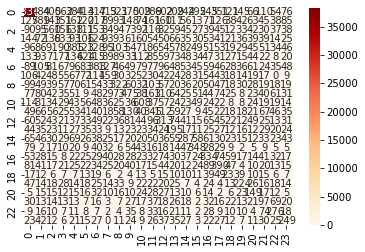

In [224]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [225]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 2.846553158888874
MSE: 32.157713289392
RMSE: 5.670777132756321


In [226]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.5807715794781405
Recall Score :  0.6187802977267624
f1_score :  0.5948914376461123


# Random Forest

In [227]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train_encode, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred3 = RandomForestClassifier.predict(X_test_encode)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

In [ ]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

In [ ]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))